# plot stereonet for KRBS? deep borehole in Wonju KIGAM branch

## read data file csv

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mplstereonet as mpl

data = np.genfromtxt('/home/bjung/github/dfnWorks/hlwd-2021/data/Az_dip_KSRS_csv.csv',dtype=None,delimiter=',',
                   skip_header=1,usecols=(0,1,2))
        
print(data)
print(data.shape[0])



[[ 54.95  92.44  68.81]
 [ 56.55  10.76  59.18]
 [ 57.5  348.44  47.96]
 ...
 [751.5  166.61  61.53]
 [752.71 187.56  14.94]
 [754.13 175.22  35.55]]
576


In [2]:
depth_m = data[:,0]
strike = (data[:,1])
dip = (data[:,2])

print(strike[0],dip[0])

92.44 68.81


## plot poles on stereonet
NOTE: It seems 0-90-180-270 deg in stereonet correspond to W-N-E-S

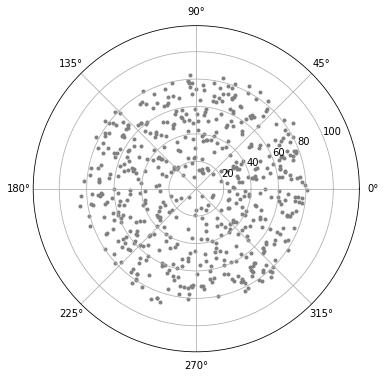

In [3]:
[fig,ax] = mpl.subplots(figsize=(9.8,6),projection='polar')

ax.scatter(strike,dip,marker='.',color='grey')

plt.show()
# What do you know from below figure?

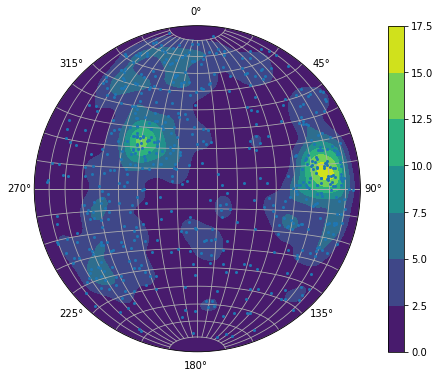

In [4]:
[fig,ax] = mpl.subplots(figsize=(9.8,6),projection='equal_area')

cax = ax.density_contourf(strike,dip,measurement='poles',method='exponential_kamb',sigma=3)

ax.pole(strike,dip,markersize=2)
ax.grid(True)
fig.colorbar(cax)

plt.show()

In [5]:
#ax.density_contourf?

## k-means analysis

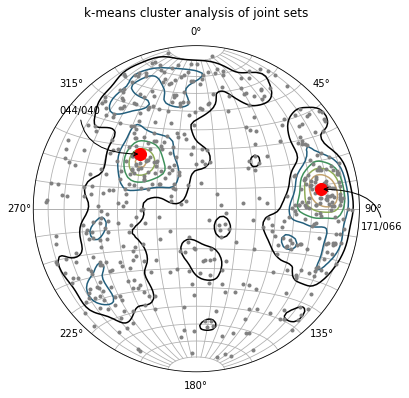

In [6]:
# Plot the raw data and contour it:
fig,ax = mpl.subplots(figsize=(9.8,6),projection='equal_area')

ax.density_contour(strike,dip,measurement='poles',cmap='gist_earth',sigma=3)
ax.pole(strike,dip,marker='.',color='grey')

# Find the two modes
centers = mpl.kmeans(strike, dip, num=2, measurement='poles')
strike_cent,dip_cent = mpl.geographic2pole(*zip(*centers))
ax.pole(strike_cent, dip_cent, 'ro', ms=12)

# Label the modes
for (x0, y0) in centers:
    s, d = mpl.geographic2pole(x0, y0)
    x, y = mpl.pole(s, d) # Otherwise, we may get the antipode...

    if x > 0:
        kwargs = dict(xytext=(40, -40), ha='left')
    else:
        kwargs = dict(xytext=(-40, 40), ha='right')

    ax.annotate('{:03.0f}/{:03.0f}'.format(s[0], d[0]), xy=(x, y),
                xycoords='data', textcoords='offset points',
                arrowprops=dict(arrowstyle='->', connectionstyle='angle3'),
                **kwargs)

ax.grid(True)
ax.set_title('k-means cluster analysis of joint sets', y=1.07)
plt.show()


In [7]:
#mpl.kmeans?

## Group data by k-means center

In [8]:
# calculate distances from every k-means centers 
# a date point is a member of the group having the least distance between the center and data

#mpl.angular_distance?
# we have strike and dip
# we have k-means centers

# set k-means group number
nkmean= len(centers)

# convert strike/dip to lon,lat
lond,latd = mpl.pole(strike,dip)
pointd = lond,latd
 
dist_from_center = np.zeros((dip.shape[0],nkmean))
#print(dist_from_center.shape)

# loop k-means centers
nn=0
for x in centers:
    dist_from_center[:,nn] = mpl.angular_distance(x, pointd, bidirectional=True)
    nn+=1
    
# compare distance from each center and assign the closest on as a group number
grp= np.argmax(dist_from_center,axis=1)

print(grp)
print(len(grp))
print(type(grp))
print(type(strike))


[0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 0 1 1 1
 0 1 1 1 1 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0 1
 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1 0 1 0 0 1 1 0 1 0 0 0
 0 0 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 0
 0 0 0 0 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 1 0 1 1 1 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1
 0 0 0 0 0 1 0 0 0 0 1 0 

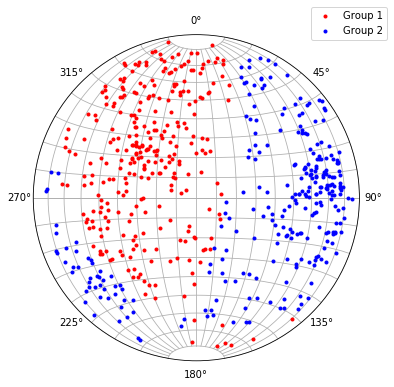

In [9]:
# plot joint group 1 & 2 seperately

fig,ax = mpl.subplots(figsize=(9.8,6),projection='equal_area')

# color map
cmap = ['red','blue','green','yellow','cyan']

# plot poles in groups
for ngrp in range(nkmean):
    mask = grp == ngrp
    ax.pole(strike[mask],dip[mask],marker='.',color=cmap[ngrp])



ax.grid(True)
plt.legend(["Group 1","Group 2"],bbox_to_anchor =(1.1, 1.1))

plt.show()



## Goodness-of-fit test for Fisher distribution
This test is followed by the procedure suggested by Lewis and Fisher (1982).<br>
Graphical methods for investigating the fit of a Fisher distrubution to shperical data, Geophys. J. R. astr. Soc. (1982) **69**, 1-13 


k= 5.667264345680512


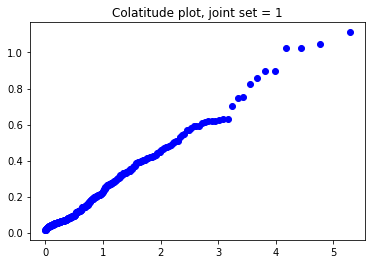

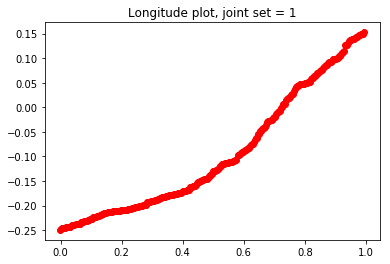

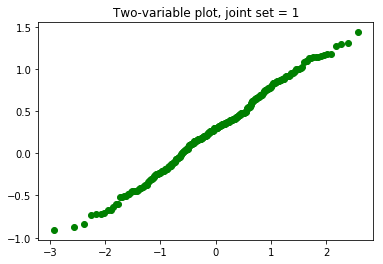

k= 7.948877308728584


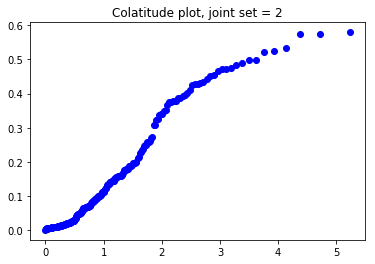

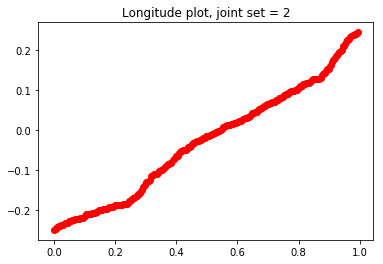

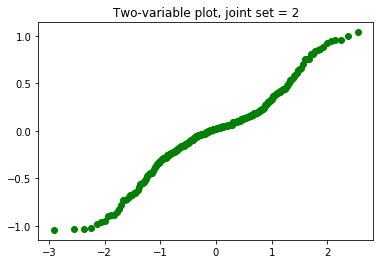

In [10]:
# step 1: calculations
#print(strike[0],dip[0],lond[0],latd[0])
#print(mpl.pole(strike[0],dip[0]))

# loop joint group
for ngrp in range(nkmean):
    mask = grp == ngrp

    # let's say theta= latd, phi= lond
    phi = lond[mask] # related to strike
    theta = latd[mask] # related to dip

    # get theta' and phi'
    # page 6-equation(2-3) in L&F paper
    L = np.sum(np.sin(theta)*np.cos(phi))
    M = np.sum(np.sin(theta)*np.sin(phi))
    N = np.sum(np.cos(theta))
    R = np.sqrt(L**2+M**2+N**2)

    theta_bar = np.arccos(N/R)
    phi_bar = np.arccos(L/R/np.sin(theta_bar))

    # theta' and phi'
    theta_p = np.arccos(np.sin(theta)*np.sin(theta_bar)*np.cos(phi-phi_bar)+np.cos(theta)*np.cos(theta_bar))
    phi_p = np.arcsin(np.sin(theta)*np.sin(phi-phi_bar)/np.sin(theta_p))

 
    #--- colatitude plot
    # c' = 1-cos(theta') in ascending order
    c_p = np.sort(1-np.cos(theta_p))

    # ein = quantile of the unit exponential distribution
    tn = theta.size
    ein = np.zeros(tn)
    for nn in range(tn):
        ein[nn] = np.log(tn/(tn-nn+0.5))


    # fisher k (not for the original data b/c whole dataset is rotated for normality test) 
    k= (tn-1)/(tn-R)
    print('k=',k) #check this value is identical to the slope of the graph

        
        
    # plot c' against ein
    plt.plot(ein,c_p,'bo')
    plt.title("Colatitude plot, joint set = %d"%(ngrp+1))
    plt.show()

    

    #--- logitude plot

    phi_p_2pi = np.sort(phi_p/(2*np.pi))
    uin = np.zeros(tn)
    for nn in range(tn):
        uin[nn] =  (nn-0.5)/tn

    # plot phi'/2pi against uin
    plt.plot(uin,phi_p_2pi,'ro')
    plt.title('Longitude plot, joint set = %d'%(ngrp+1))
    plt.show()


    # --- two-variable plot

    # theta'' and phi'' by equaion 2-4 in the reference
    theta_2p = np.arccos(np.sin(theta)*np.cos(theta_bar)*np.cos(phi-phi_bar)-np.cos(theta)*np.sin(theta_bar))
    phi_2p = np.arcsin(-np.sin(theta)*np.sin(phi-phi_bar)/np.sin(theta_2p))

    phi_2p_sqrt = np.sort(phi_2p*np.sqrt(np.sin(theta_2p)))
    qin = np.zeros(tn)

    from scipy.stats import norm
    for nn in range(tn):
        qin[nn] =  norm.ppf((nn-0.5)/tn) # norm.ppf: inverse function of normal distribution quantiles

    # plot phi'/2pi against uin
    plt.plot(qin,phi_2p_sqrt,'go')
    plt.title('Two-variable plot, joint set = %d'%(ngrp+1))
    plt.show()



## Fisher statistics for each joint group

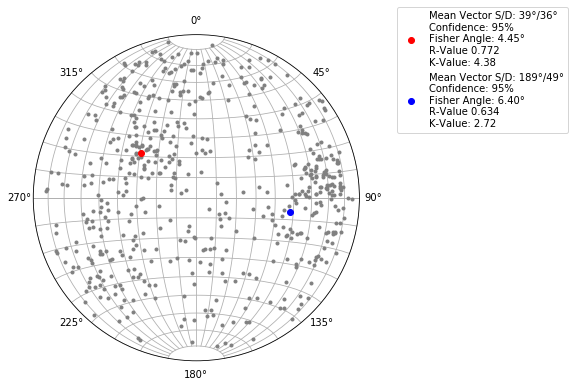

In [11]:
# set confidence level
confidence = 95

fig,ax = mpl.subplots(figsize=(9.8,6),projection='stereonet')
#fig,ax = mpl.subplots(figsize=(9.8,6),projection='polar')


#ax.line(dip[grp==ngrp],strike[grp==ngrp],color=cmap[ngrp],markersize=2)
ax.pole(strike,dip,color='grey',marker='.')


for ngrp in range(nkmean):

    mask = grp == ngrp
    # fisher statics: this function needs data in lon, lat format
    fcenter,stats = mpl.stereonet_math.fisher_stats(lond[mask], latd[mask], confidence)
    #print(fcenter,stats)
    # lon, lat to pole(strike, dip) 
    mean_vec =  mpl.stereonet_math.geographic2pole(fcenter[0],fcenter[1])
    mean_strike = mean_vec[0][0]
    mean_dip = mean_vec[1][0]

    template = (u"Mean Vector S/D: {strike:0.0f}\u00B0/{dip:0.0f}\u00B0\n"
                 "Confidence: {conf}%\n"
                 u"Fisher Angle: {fisher:0.2f}\u00B0\n"
                 u"R-Value {r:0.3f}\n"
                 "K-Value: {k:0.2f}")
    label = template.format(strike=mean_strike,dip=mean_dip,conf=confidence,
                            r=stats[0],fisher=stats[1],k=stats[2])
    
    # plot mean strikes dips of each joint group
    ax.pole(mean_strike,mean_dip,color=cmap[ngrp],label=label)


ax.legend(bbox_to_anchor=(1.1, 1.1),numpoints=1)
ax.grid(True)
plt.show()

# print(fcenter,stats)
# print(strike[0],dip[0])

We need this to each joint sets

In [12]:
ax.cone?

Signature: ax.cone(plunge, bearing, angle, segments=100, bidirectional=True, **kwargs)
Docstring:
Plot a polygon of a small circle (a.k.a. a cone) with an angular radius
of *angle* centered at a p/b of *plunge*, *bearing*. Additional keyword
arguments are passed on to the ``PathCollection``.  (e.g. to have an
unfilled small small circle, pass "facecolor='none'".)

Parameters
----------
plunge : number or sequence of numbers
    The plunge of the center of the cone in degrees.
bearing : number or sequence of numbers
    The bearing of the center of the cone in degrees.
angle : number or sequence of numbers
    The angular radius of the cone in degrees.
segments : int, optional
    The number of vertices to use for the cone. Defaults to 100.
bidirectional : boolean, optional
    Whether or not to draw two patches (the one given and its antipode)
    for each measurement. Defaults to True.
**kwargs
    Additional parameters are ``matplotlib.collections.PatchCollection``
    properties.

R